In [2]:
%pip install pandas
import pandas as pd

Note: you may need to restart the kernel to use updated packages.


In [3]:
#https://stats.oecd.org/SDMX-JSON/data/CITIES/AUS+AUS01+AUS02+AUS03+AUS04.POP_DEN_HINTER/all?startTime=2019&endTime=2021&contentType=csv&csv This url works
#The following API is for all USA metro areas in OECD cities database. 
urlmetro = 'https://stats.oecd.org/SDMX-JSON/data/CITIES/USA+USA01+USA02+USA03+USA04+USA05+USA06+USA07+USA08+USA09+USA10+USA11+USA12+USA13+USA14+USA15+USA16+USA17+USA18+USA19+USA20+USA21+USA22+USA23+USA24+USA25+USA26+USA27+USA28+USA29+USA30+USA31+USA32+USA33+USA34+USA35+USA36+USA37+USA38+USA39+USA40+USA41+USA42+USA43+USA44+USA45+USA46+USA47+USA48+USA49+USA50+USA51+USA52+USA53+USA54+USA55+USA56+USA57+USA58+USA59+USA60+USA61+USA62+USA63+USA64+USA65+USA66+USA67+USA68+USA69+USA70+USA71+USA72+USA73+USA74+USA75+USA76+USA77+USA78+USA79+USA80+USA81+USA82+USA83+USA84+USA85+USA86+USA87+USA88+USA89+USA90+USA91+USA92+USA93+USA94+USA95+USA96+USA97+USA98+USA99+USA100+USA101+USA102+USA103+USA104+USA105+USA106+USA107+USA108+USA109+USA110+USA111+USA112+USA113+USA114+USA115+USA116+USA117+USA118+USA119+USA120+USA121+USA122+USA123+USA124+USA125+USA126+USA127+USA128+USA129+USA130+USA131+USA132+USA133+USA134+USA135+USA136+USA137+USA138+USA139+USA140+USA141+USA142+USA143+USA144+USA145+USA146+USA147+USA148+USA149+USA150+USA151+USA152+USA153+USA154+USA155+USA156+USA157+USA158+USA160+USA161+USA162+USA170.POP_DEN+T_T+POP_TOT_GI+T_T_SH_NAT+T_Y15_64+EMP_RA_15_MAX+EMP_RA_15_MAX_GR_2007+GDP_REAL_PPP+GDP_SH_NAT+GDP_PC_REAL_PPP+EMP_IND_TOTAL+GDP_PW_REAL_PPP+XDSL+SPEX_25_CORE+TREECOVER_SHARE_CORE/all?startTime=2000&endTime=2021&contentType=csv&csv'
dfmetro = pd.read_csv(urlmetro)

<ipython-input-136-3854dc68d1f6>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  dfmetro.metropolitan_areas = dfmetro.metropolitan_areas.str.replace('(Greater)','')
<ipython-input-136-3854dc68d1f6>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  dfmetro.metropolitan_areas = dfmetro.metropolitan_areas.str.replace(r"\(.*?\)","")
<ipython-input-136-3854dc68d1f6>:9: FutureWarning: The default value of regex will change from True to False in a future version.
  dfmetro.metropolitan_areas = dfmetro.metropolitan_areas.str.replace('[\([{})\]]','')
<ipython-input-136-3854dc68d1f6>:12: FutureWarning: The default value of regex will change from True to False in a future version.
  dfmetro.metropolitan_areas = dfmetro.metropolitan_areas.str.replace('[\([{})\]]','')


961348.4567901235
366518.0


Index(['metro_id', 'metropolitan_areas', 'var', 'variables', 'time', 'year',
       'unit_code', 'unit', 'powercode_code', 'powercode',
       'reference_period_code', 'reference_period', 'value', 'flag_codes',
       'flags'],
      dtype='object')

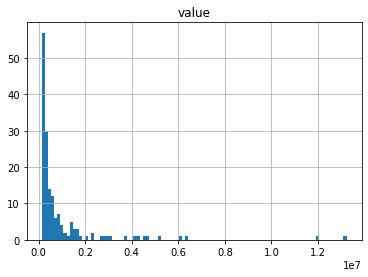

In [136]:
#Tidy up the column names and specific columns to make it easier to conduct analysis.
import matplotlib as plt
dfmetro.columns = dfmetro.columns.str.lower()
dfmetro.columns = dfmetro.columns.str.replace(' ', '_')
dfmetro.variables = dfmetro.variables.str.lower()
dfmetro.variables = dfmetro.variables.str.replace(' ', '_')
dfmetro.metropolitan_areas = dfmetro.metropolitan_areas.str.replace('(Greater)','')
dfmetro.metropolitan_areas = dfmetro.metropolitan_areas.str.replace(r"\(.*?\)","")
dfmetro.metropolitan_areas = dfmetro.metropolitan_areas.str.replace('[\([{})\]]','')
dfmetro.metropolitan_areas = dfmetro.metropolitan_areas.str.replace('-','')
dfmetro.metropolitan_areas = dfmetro.metropolitan_areas.str.replace(' ','')
dfmetro.metropolitan_areas = dfmetro.metropolitan_areas.str.replace('[\([{})\]]','')
dfmetro.metropolitan_areas = dfmetro.metropolitan_areas.str.lower()


#print(dfmetro.variables.unique())
h = dfmetro[(dfmetro['variables'] == 'working_age_population_group_(15-64)') & (dfmetro.year == 2018)]
h.hist(column='value',bins=100) #This shows that population density is not normally distributed with most of the data on the left handside of the distribution.
print(h.value.mean()) #The mean population density is 167.1
print(h.value.median()) #The median population density is 126.5
#WB data for the USA shows that population density (population per km2 of land) in 2020 was 36. Therefore, this dataset of cities is significantly larger than the country as a whole.
dfmetro.columns

<ipython-input-140-08bfae83711e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['diff_avg'] = ((x['value'] - x.value.median())/x.value.median())
<ipython-input-140-08bfae83711e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['diff_avg'] = ((y['value'] - y.value.mean())/y.value.median())


array(['ada', 'alachua', 'albany', 'albuquerque', 'allen', 'atlanta',
       'atlanticcity', 'austin', 'bell', 'bentonar', 'bentonwa', 'berks',
       'boston', 'boulder', 'brazos', 'brevard', 'brown', 'butte',
       'caddo', 'cameron', 'charleston', 'charlotte', 'chatham',
       'chicago', 'cincinnati', 'collier', 'columbus', 'cumberlandme',
       'cumberlandnc', 'cuyahoga', 'dallas', 'dane', 'dauphin',
       'davidson', 'denver', 'detroit', 'douglasne', 'durham',
       'eastbatonrouge', 'elpasoco', 'elpasotx', 'erieny', 'eriepa',
       'escambia', 'fayette', 'forsyth', 'fresno', 'genesee', 'greene',
       'greenville', 'guilford', 'hamiltontn', 'hampden', 'hartford',
       'hidalgo', 'houston', 'indianapolis', 'ingham', 'jacksonmo',
       'jacksonville', 'jeffersonal', 'jeffersonky', 'jeffersontx',
       'kalamazoo', 'kent', 'kern', 'knox', 'lackawanna', 'lafayette',
       'lancasterne', 'lancasterpa', 'lane', 'larimer', 'lasvegas', 'lee',
       'lehigh', 'losangeles', 'l

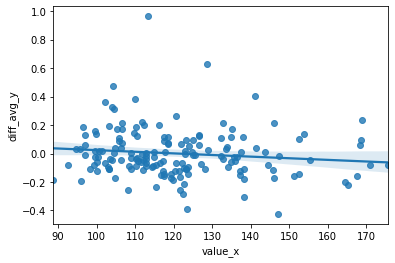

In [140]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
x = dfmetro[(dfmetro['variables'] == 'growth/shrinking_index_of_the_total_population_(2001=100)') & (dfmetro.year == 2019)]
x['diff_avg'] = ((x['value'] - x.value.median())/x.value.median())
y = dfmetro[(dfmetro['variables'] == 'labour_productivity_(gdp_per_worker_in_usd,_constant_prices,_constant_ppp,_base_year_2015)') & (dfmetro.year == 2019)]
y['diff_avg'] = ((y['value'] - y.value.mean())/y.value.median())
mdf = pd.merge(x,y,left_on='metro_id',right_on='metro_id')
mdf = mdf.sort_values('diff_avg_x',ascending=False)


from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(mdf[['value_x']], mdf[['diff_avg_y']])

#xfit = np.linspace(-1, 7, 162)
#yfit = model.predict(mdf[['value_x']])

#plt.scatter(mdf['value_x'],mdf['diff_avg_y'])
#plt.plot(xfit, yfit,color='red')
sns.regplot(data=mdf,x='value_x',y='diff_avg_y')
mdf.metropolitan_areas_x.sort_values(ascending=True).unique()


In [141]:
dfeduc = pd.read_excel(r'C:\Users\vw191\OneDrive - University of Bristol\Course\3rd year\Data Science\Project\Datastore\US_educationa_attainment_metro.xlsx')
dfeduc.columns = dfeduc.columns.str.lower()
dfeduc.columns = dfeduc.columns.str.replace(' ','_')
dfeduc[['name','state_abbrv']] = dfeduc['name'].str.split(',',1,expand=True)
dfeduc.name = dfeduc.name.str.replace('-','')
dfeduc.name = dfeduc.name.str.replace(' ','')
dfeduc.name = dfeduc.name.str.lower()
dfeduc.name.sort_values(ascending=True).unique()

array(['abilene', 'aguadillaisabela', 'akron', 'albany',
       'albanyschenectadytroy', 'albuquerque', 'alexandria',
       'allentownbethlehemeaston', 'altoona', 'amarillo', 'ames',
       'anchorage', 'annarbor', 'annistonoxfordjacksonville', 'appleton',
       'asheville', 'athensclarkecounty', 'atlantasandyspringsroswell',
       'atlanticcityhammonton', 'auburnopelika', 'augustarichmondcounty',
       'austinroundrock', 'bakersfield', 'baltimorecolumbiatowson',
       'bangor', 'barnstabletown', 'batonrouge', 'battlecreek', 'baycity',
       'beaumontportarthur', 'beckley', 'bellingham', 'bendredmond',
       'billings', 'binghamton', 'birminghamhoover', 'bismarck',
       'blacksburgchristiansburgradford', 'bloomington',
       'bloomsburgberwick', 'boisecity', 'bostoncambridgenewton',
       'boulder', 'bowlinggreen', 'bremertonsilverdale',
       'bridgeportstamfordnorwalk', 'brownsvilleharlingen', 'brunswick',
       'buffalocheektowaganiagarafalls', 'burlington',
       'bur

In [139]:
mmdf = pd.merge(mdf,dfeduc,left_on='metropolitan_areas_x',right_on='name')
mmdf

,metro_id,metropolitan_areas_x,var_x,variables_x,time_x,year_x,unit_code_x,unit_x,powercode_code_x,powercode_x,...,other,population_age_25+_with_at_least_a_bachelor's_degree_(2017),share_of_population_age_25+_with_at_least_a_bachelor's_degree,share_(rank_out_of_388),percentage_point_increase:_share_of_population_age_25+_with_at_least_a_bachelor's_degree_(2007-2017),change_(rank_out_of_388),2007_ba+,2012_ba+,2017_ba+,state_abbrv
0,USA69,charleston,POP_TOT_GI,growth/shrinking_index_of_the_total_population...,2019,2019,NaN,NaN,0,Units,...,0.772,35949.216,22.8,267,3.1,210,19.7,21.5,22.8,WV
1,USA98,greenville,POP_TOT_GI,growth/shrinking_index_of_the_total_population...,2019,2019,NaN,NaN,0,Units,...,0.691,32609.388,30.9,125,4.6,61,26.3,25.6,30.9,NC
2,USA33,jacksonville,POP_TOT_GI,growth/shrinking_index_of_the_total_population...,2019,2019,NaN,NaN,0,Units,...,0.701,296025.249,29.9,142,4.3,80,25.6,27.0,29.9,FL
3,USA33,jacksonville,POP_TOT_GI,growth/shrinking_index_of_the_total_population...,2019,2019,NaN,NaN,0,Units,...,0.798,20515.322,20.2,319,4.5,70,15.7,18.4,20.2,NC
4,USA127,madison,POP_TOT_GI,growth/shrinking_index_of_the_total_population...,2019,2019,NaN,NaN,0,Units,...,0.552,189713.216,44.8,17,3.6,157,41.2,42.1,44.8,WI
5,USA154,merced,POP_TOT_GI,growth/shrinking_index_of_the_total_population...,2019,2019,NaN,NaN,0,Units,...,0.863,21448.994,13.7,385,1.0,369,12.7,12.5,13.7,CA
6,USA46,richmond,POP_TOT_GI,growth/shrinking_index_of_the_total_population...,2019,2019,NaN,NaN,0,Units,...,0.648,306392.768,35.2,62,5.0,36,30.2,31.7,35.2,VA
7,USA31,columbus,POP_TOT_GI,growth/shrinking_index_of_the_total_population...,2019,2019,NaN,NaN,0,Units,...,0.647,475859.179,35.3,61,3.5,161,31.8,33.4,35.3,OH
8,USA31,columbus,POP_TOT_GI,growth/shrinking_index_of_the_total_population...,2019,2019,NaN,NaN,0,Units,...,0.688,17115.384,31.2,115,5.5,25,25.7,26.6,31.2,IN
9,USA31,columbus,POP_TOT_GI,growth/shrinking_index_of_the_total_population...,2019,2019,NaN,NaN,0,Units,...,0.758,48571.094,24.2,232,3.6,155,20.6,21.1,24.2,GA-AL


In [235]:
#The best way to work with an api from Bea is to use the xml format over the json format.
#This is because vegalite cannot read large numbers in the json format of the api because there are commas in the numbers.
#Therefore I found it better to read the data in an xml format in Jupyter notebook and then conduct the analysis before taking the data into vegalite.

#https://apps.bea.gov/api/data/?UserID=F88DCBE6-81B9-4A33-BDD9-F9B983466DEF&method=GetParameterValuesFiltered&datasetname=Regional&TargetParameter=LineCode&TableName=CAGDP1&ResultFormat=xml


#CAGDP1-3 GDP in current USD.
df = pd.read_xml('https://apps.bea.gov/api/data/?UserID=F88DCBE6-81B9-4A33-BDD9-F9B983466DEF&method=GetData&datasetname=Regional&TableName=CAGDP1&LineCode=3&Year=2018&GeoFips=MSA&ResultFormat=xml',xpath="//Data") #Used api with apikey to get data from Bea. Needs to get Data in the element tree.
df
#CAINC30-100 Total population.
df1 = pd.read_xml('https://apps.bea.gov/api/data/?UserID=F88DCBE6-81B9-4A33-BDD9-F9B983466DEF&method=GetData&datasetname=Regional&TableName=CAINC30&LineCode=100&Year=2018&GeoFips=MSA&ResultFormat=xml',xpath="//Data") #Used api with apikey to get data from Bea. Needs to get Data in the element tree.
df1
#CAINC30-190 Wages and Salaries.
df2 = pd.read_xml('https://apps.bea.gov/api/data/?UserID=F88DCBE6-81B9-4A33-BDD9-F9B983466DEF&method=GetData&datasetname=Regional&TableName=CAINC30&LineCode=190&Year=2018&GeoFips=MSA&ResultFormat=xml',xpath="//Data") #Used api with apikey to get data from Bea. Needs to get Data in the element tree.
df2
#CAINC30-300 Average Wages and Salaries.
df3 = pd.read_xml('https://apps.bea.gov/api/data/?UserID=F88DCBE6-81B9-4A33-BDD9-F9B983466DEF&method=GetData&datasetname=Regional&TableName=CAINC30&LineCode=300&Year=2018&GeoFips=MSA&ResultFormat=xml',xpath="//Data") #Used api with apikey to get data from Bea. Needs to get Data in the element tree.
df3

,Code,GeoFips,GeoName,TimePeriod,CL_UNIT,UNIT_MULT,DataValue,NoteRef
0,CAINC30-300,998,United States (Metropolitan Portion),2018,Dollars,0,"59,609",None
1,CAINC30-300,10180,"Abilene, TX (Metropolitan Statistical Area)",2018,Dollars,0,"44,010",None
2,CAINC30-300,10420,"Akron, OH (Metropolitan Statistical Area)",2018,Dollars,0,"50,009",None
3,CAINC30-300,10500,"Albany, GA (Metropolitan Statistical Area)",2018,Dollars,0,"42,194",None
4,CAINC30-300,10540,"Albany-Lebanon, OR (Metropolitan Statistical A...",2018,Dollars,0,"44,642",None
...,...,...,...,...,...,...,...,...
380,CAINC30-300,49420,"Yakima, WA (Metropolitan Statistical Area)",2018,Dollars,0,"40,613",None
381,CAINC30-300,49620,"York-Hanover, PA (Metropolitan Statistical Area)",2018,Dollars,0,"48,992",None
382,CAINC30-300,49660,"Youngstown-Warren-Boardman, OH-PA (Metropolita...",2018,Dollars,0,"41,860",None
383,CAINC30-300,49700,"Yuba City, CA (Metropolitan Statistical Area)",2018,Dollars,0,"47,959",None


95664175.14805195
12550113.0
1461929.2519480519
250493.0
42377099.74545454
5364761.0
48728.64155844156
47110.0


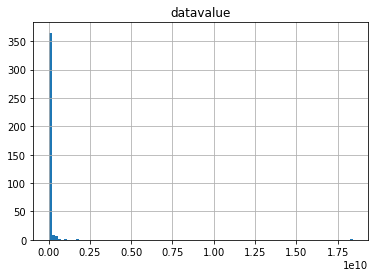

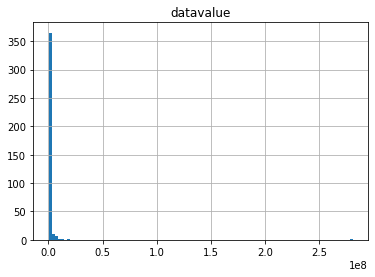

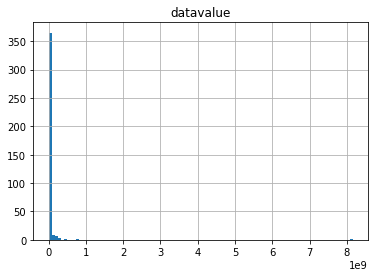

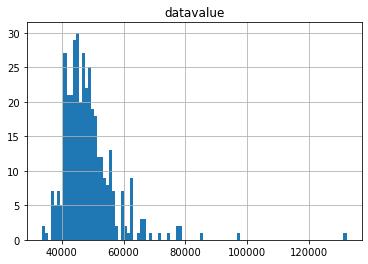

In [236]:
#Automates finding simple mean and median values for each df as well as data cleaning. The for loop removes the , from the datavalue column and converts it to a float.
for i in [df, df1, df2, df3]:
    i.columns = i.columns.str.lower()
    i.columns = i.columns.str.replace(' ','_')
    i.datavalue = i.datavalue.astype('str').str.replace(",",'')
    i.datavalue = i.datavalue.astype('float')
    h = i
    h.hist(column='datavalue',bins=100) 
    print(h.datavalue.mean())
    print(h.datavalue.median()) 
